# Netflix Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df['show_id'] = df['show_id'].str.replace('s','').astype(int)

In [9]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
# Identify missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Represent missing values in percentaje
for column in df.columns:
    percent = df[column].isnull().mean()
    print(f'{column}:{round(percent*100,2)}%')

show_id:0.0%
type:0.0%
title:0.0%
director:29.91%
cast:9.37%
country:9.44%
date_added:0.11%
release_year:0.0%
rating:0.05%
duration:0.03%
listed_in:0.0%
description:0.0%


## Imputacion de datos

In [12]:
df.drop('director', axis=1, inplace=True)

In [13]:
df.dropna(subset=['cast','country','date_added'], inplace=True)

In [14]:
mode = ''.join(df['rating'].mode())
df['rating'].fillna(mode, inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

## Trend of content produced by Ten years on Netflix

In [16]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=19)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

In [23]:
last10df = df[['type','release_year']]
last10df = last10df.groupby(['type','release_year']).size().reset_index(name='Total content')
last10df = last10df[last10df['release_year'] > 2012]
last10df

,type,release_year,Total content
63,Movie,2013,196
64,Movie,2014,237
65,Movie,2015,346
66,Movie,2016,574
67,Movie,2017,650
68,Movie,2018,653
69,Movie,2019,513
70,Movie,2020,417
71,Movie,2021,152
105,TV Show,2013,54


In [28]:
lineplot = last10df.pivot(index='type', columns='release_year', values='Total content').T
lineplot

type,Movie,TV Show
release_year,,
2013,196,54
2014,237,73
2015,346,129
2016,574,177
2017,650,213
2018,653,282
2019,513,309
2020,417,327
2021,152,183


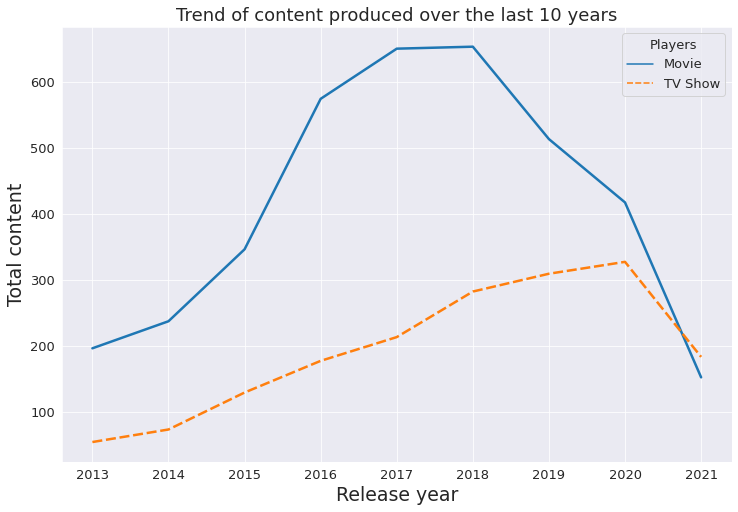

In [33]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Release year', ylabel='Total content', title='Trend of content produced over the last 10 years')
ax.legend(title='Players', title_fontsize=13)
plt.show()

## Grouping based on type

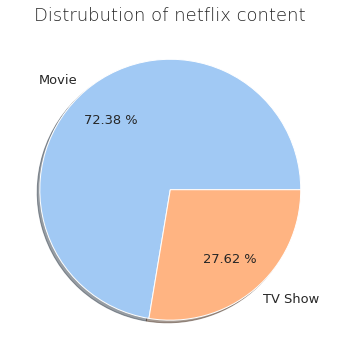

In [38]:
types = df.groupby(['type']).size().reset_index(name='Counts')
colors = sns.color_palette('pastel')
plt.figure(figsize=(7,6))
plt.pie(types['Counts'], labels=types['type'],  autopct='%1.2f %%', pctdistance=.7, colors=colors, shadow=True)
plt.title('Distrubution of netflix content', weight='light')
plt.show()

## The Top 5 actos in netflix

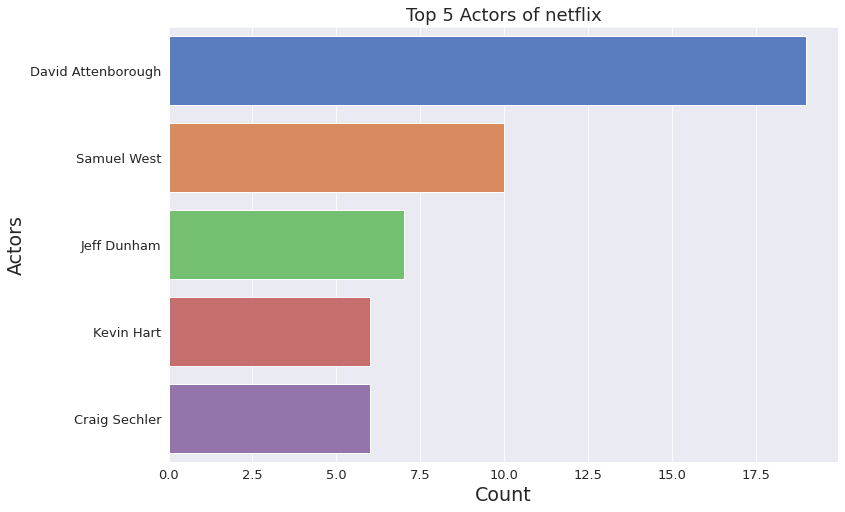

In [47]:
Per = df.copy()
actors = Per.groupby(['cast']).size().reset_index(name='count')
actors = actors.sort_values(by=['count'],ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x= actors['count'].head(5), y=actors['cast'].head(5), palette='muted', ci=None)
ax.set(title='Top 5 Actors of netflix', xlabel = 'Count', ylabel='Actors')
plt.show()

## Conclusiones

- El actor que ha tenido mas protagonismo en netflix es David A.
- Se producen mas peliculas que TV Shows.
- Esta decayendo la cantidad de produccion de netflix.